<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/demo/python/wcci2022_gabo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GABO: Gene Analysis Base Optimization
This notebook contains the python code used for getting the results reported in the paper "GABO: Gene Analysis Base Optimization" written by Professors Jonatan Gomez and Elizabeth Leon from Universidad Nacional de Colombia and published in the IEEE World Congress on Computational Intelligence - WCCI 2022 Proceedings https://doi.org/10.1109/CEC55065.2022.9870237.

Algorithms are written using the **sgoal** python package that can be obtained from the github of professor Jonatan Gomez: https://github.com/jgomezpe/sgoal/. 
To run scripts in this notebook, you must install it from the github repository:

In [ ]:
!pip install git+https://github.com/jgomezpe/sgoal/

##Experiments
Now you can run each one of the algorithms on the testbed functions. Here we compare GABO, GSC1, RMHC, GGA, SSGA, and CHAVELA

================= 120 =================
*************** Mixed ***************
SGOAL SR MAX STD ITER STD BUDGET STD
GABO 40.0 274.0 8.0 8073.9 2818.75 12000.0 0.0
[282, 282, 274, 258, 266, 266, 282, 282, 274, 274]
GSC1 0.0 209.4 1.5 11999.0 0.0 12000.0 0.0
[211, 209, 209, 208, 211, 207, 210, 208, 209, 212]
RMHC 0.0 267.0 2.41 6641.3 1796.38 12000.0 0.0
[265, 270, 268, 267, 269, 266, 270, 268, 262, 265]
SSGA 0.0 243.6 8.2 4004.8 2015.39 12000.0 0.0
[249, 255, 226, 239, 241, 253, 240, 250, 245, 238]
GGA 0.0 244.6 7.66 6978.8 3292.82 12000.0 0.0
[245, 240, 245, 243, 249, 252, 226, 251, 241, 254]
CHAVELA 30.0 276.0 6.13 11178.6 537.28 12000.0 0.0
[281, 275, 274, 282, 266, 281, 282, 282, 268, 269]


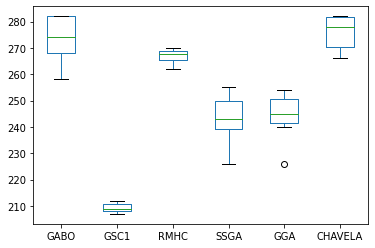

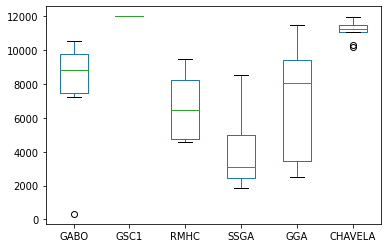

In [2]:
import sgoal
from sgoal.binary import maxones
from sgoal.binary import deceptive
from sgoal.binary import boundedly
from sgoal.binary import royalroad8
from sgoal.binary import mixed
from sgoal.binary import bitstring
from sgoal.binary import bit_mutation
from sgoal.binary import bitstring_population
from sgoal.core import simple_crossover
from sgoal.core import transposition
from sgoal.core import init
from sgoal.core import best_evaluation
from sgoal.core import success_evaluation
from sgoal.core import evaluations
from sgoal.util import stats
from sgoal.binary import GSC1
from sgoal.binary import RMHC
from sgoal.ga import basic_binary_GGA
from sgoal.ga import basic_binary_SSGA
from sgoal.chavela import CHAVELA
from sgoal.gabo import GABO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame()
dfiter = pd.DataFrame()

def round(x): return (int(100*x+0.5))/100

# Paper reported values
def report(sgoal, fx, iter, budget, sr):
  sr *= 100/len(fx)
  avg, std = stats(fx)
  avg, std = round(avg), round(std)  
  avg_iter, std_iter = stats(iter)
  avg_iter, std_iter = round(avg_iter), round(std_iter)  
  avg_budget, std_budget = stats(budget)
  avg_budget, std_budget = round(avg_budget), round(std_budget)  
  print(sgoal, sr, avg, std, avg_iter, std_iter, avg_budget,  std_budget) 
  return avg, std, avg_iter, std_iter, avg_budget, std_budget

EXP = 10 # Number of experiments

D = 120 # Bitstring length

MAX_EVALS = 100*D # Maximum number of function evaluations carried on by gabo (may require less thatn those)

#Function
testbed = [maxones, deceptive, boundedly, royalroad8, mixed] # Testbed
name = ['MaxOnes','GD3','GBD4','RR1','Mixed']
FUNCTION = 4 # Testing the deceptive function. Change the number accordingly
OPTIMUM = [D, 10*D, D, D, 47*D//20] # Optimum value of the associated test function

print('=================', D, '=================')
print('***************', name[FUNCTION], '***************')
print('SGOAL SR MAX STD ITER STD BUDGET STD')

fx = [] # Function value reached by the sgoal
iter = [] # Iter when the best value is reached by the sgoal
budget = [] # Number of fuction evaluations carried on by the sgoal
sr = 0 # Success rate of the sgoal

#GABO experiment
for i in range(EXP):
  init()
  y, fy = GABO(testbed[FUNCTION], MAX_EVALS, bitstring(D))
  fx.append(fy)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  iter.append(best_evaluation()[1]+1)
  budget.append(evaluations())
report('GABO', fx, iter, budget, sr)
print(fx)
df = df.assign(GABO = fx)
dfiter = dfiter.assign(GABO = iter)

#GSC1 experiment
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  y, fy = GSC1(testbed[FUNCTION], MAX_EVALS, bitstring(D))
  fx.append(fy)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  iter.append(best_evaluation()[1]+1)
  budget.append(MAX_EVALS)
report('GSC1', fx, iter, budget, sr)
print(fx)
df = df.assign(GSC1 = fx)
dfiter = dfiter.assign(GSC1 = iter)

#RMHC experiment
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  y, fy = RMHC(testbed[FUNCTION], MAX_EVALS, bitstring(D))
  fx.append(fy)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  iter.append(best_evaluation()[1]+1)
  budget.append(MAX_EVALS)
report('RMHC', fx, iter, budget, sr)
print(fx)
df = df.assign(RMHC = fx)
dfiter = dfiter.assign(RMHC = iter)

#GGA
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  P, fP, evals = basic_binary_SSGA(testbed[FUNCTION], MAX_EVALS, 100, D)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  fy, k = best_evaluation()
  fx.append(fy)
  iter.append(k+1)
  budget.append(MAX_EVALS)
report('SSGA', fx, iter, budget, sr)
print(fx)
df = df.assign(SSGA = fx)
dfiter = dfiter.assign(SSGA = iter)

#GGA
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  P, fP, evals = basic_binary_GGA(testbed[FUNCTION], MAX_EVALS, 100, D)
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  fy, k = best_evaluation()
  fx.append(fy)
  iter.append(k+1)
  budget.append(MAX_EVALS)
report('GGA', fx, iter, budget, sr)
print(fx)
df = df.assign(GGA = fx)
dfiter = dfiter.assign(GGA = iter)

#CHAVELA
fx = [] 
iter = [] 
budget = []
sr = 0
for i in range(EXP):
  init()
  P, fP, evals, rates = CHAVELA(testbed[FUNCTION], MAX_EVALS, [simple_crossover, bit_mutation, transposition], bitstring_population(100,D))
  sr += 1 if success_evaluation(OPTIMUM[FUNCTION]) != -1 else 0
  fy, k = best_evaluation()
  fx.append(fy)
  iter.append(k+1)
  budget.append(MAX_EVALS)
report('CHAVELA', fx, iter, budget, sr)
print(fx)
df = df.assign(CHAVELA = fx)
dfiter = dfiter.assign(CHAVELA = iter)


myFig = plt.figure();
df.boxplot(grid=False) 
myFig = plt.figure();
dfiter.boxplot(grid=False)


If we want to store performance graphics define a folder and we run the following script (here we mount our Google Drive as /drive/ and use folder /drive/MyDrive/WCCI_20022/):

Mounted at /drive


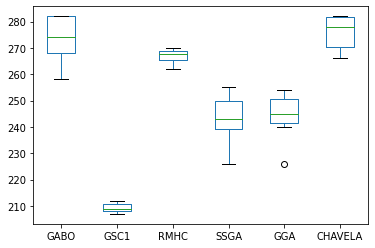

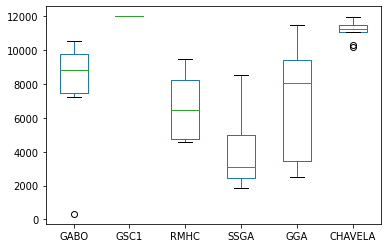

In [4]:
from google.colab import drive
import os, sys
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/drive', force_remount=True) 

path = "/drive/MyDrive/WCCI_2022/"

myFig = plt.figure();
df.boxplot(grid=False) 
figName= path+name[FUNCTION] + str(D) + ".png"
myFig.savefig(figName, format="png")


myFig = plt.figure();
dfiter.boxplot(grid=False) 
figName= path+name[FUNCTION] + str(D) + "_iter.png"
myFig.savefig(figName, format="png")